# ELG7186 - fall 2022 - Assignment 1
## Due: <strong>Wednesday Oct. 12<sup>th</sup> 2022 -- 11:59pm</strong>

The purpose of this assignment is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you will submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


## Part 0. Dataset Preparation
To complete the assignment you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


### Import Library

In [ ]:
!pip install seaborn

In [22]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow import keras
from math import sqrt
import sklearn
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score ,plot_confusion_matrix ,confusion_matrix ,classification_report
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sbr
import collections 
from sklearn import preprocessing



### Load Cifar 10 DaataSet 

In [23]:
##Downloading dataset
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape) 
print(type((x_train)))




(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
<class 'numpy.ndarray'>


### Take Sample From cifar10 

In [24]:

x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=.2,stratify=y_train,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x_test,y_test,test_size=.1,stratify=y_test,random_state=42)

### print sample data

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(9000, 32, 32, 3)
(1000, 32, 32, 3)
(9000, 1)
(1000, 1)


### check the ratio of chosen sample (classes balanced or not ?!) 

<AxesSubplot:ylabel='count'>

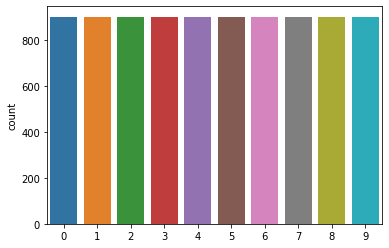

In [ ]:
sbr.countplot(y_train.flatten())

<AxesSubplot:ylabel='count'>

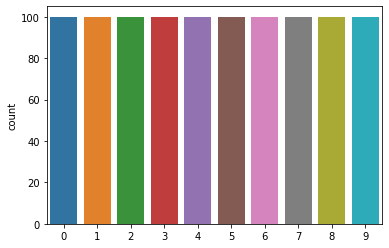

In [ ]:
sbr.countplot(y_test.flatten())

In [46]:
def Exploratory_Data(X_train, y_train, classes,number_sample=5):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y) 
        idxs = np.random.choice(idxs, number_sample, replace=False)
        for i, idx in enumerate(idxs): 
            plt_idx = i * num_classes + y + 1
            plt.subplot(number_sample, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()


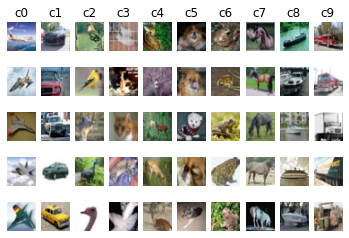

In [47]:
Exploratory_Data(x_train, y_train, classes=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'], number_sample=5)

## Part 1. k-NN Classifier (2 Marks)
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




### preprocessing step  

In [5]:
# reshaping data and placing into rows
X_train = np.reshape(x_train, (x_train.shape[0], -1))/255
X_test = np.reshape(x_test, (x_test.shape[0], -1))/255

Y_train=y_train.flatten()
Y_test=y_test.flatten()

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(9000, 3072) (1000, 3072)
(9000,) (1000,)


<AxesSubplot:ylabel='count'>

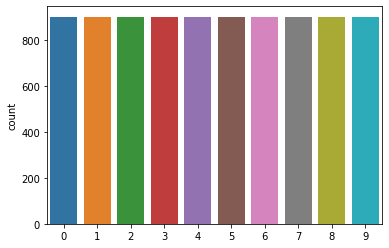

In [ ]:
sbr.countplot(Y_train)

### kneighbourclassifier

In [ ]:
class KNN_CLASS(object):
    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        return self.predict_labels(dists, k=k)

    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        dists = np.sqrt((X**2).sum(axis=1)[:, np.newaxis] + (self.X_train**2).sum(axis=1) - 2 * X.dot(self.X_train.T))
        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            sorted_dist = np.argsort(dists[i])
            closest_y = list(self.y_train[sorted_dist[0:k]])
            pass
            y_pred[i]= collections.Counter(closest_y).most_common(1)[0][0]
            pass
        return y_pred

In [ ]:
classifier = KNN_CLASS()
classifier.train(X_train, Y_train)
dists= classifier.compute_distances(X_test)
y_test_pred = classifier.predict_labels(dists, k=3)
y_test_pred=y_test_pred.astype(int)

print("the accuracy of k {0} = {1} ".format(3 , accuracy_score(Y_test, y_test_pred)))

the accuracy of k 3 = 0.306 


In [ ]:
classifier = KNN_CLASS()
classifier.train(X_train, Y_train)
dists= classifier.compute_distances(X_test)
y_test_pred = classifier.predict_labels(dists, k=5)
y_test_pred=y_test_pred.astype(int)


print("the accuracy of k {0} = {1} ".format(5 , accuracy_score(Y_test, y_test_pred)))

the accuracy of k 5 = 0.3 


In [ ]:
K_list = [1,3,5,7,10,15,30,45,60,75,90]

K_acc_dictionary = {}

for k in K_list:
    K_acc_dictionary[k] = []  
      
    classifier = KNN_CLASS()
    classifier.train(X_train, Y_train)
    dists= classifier.compute_distances(X_test)
    y_test_pred = classifier.predict_labels(dists, k=k)
    y_test_pred=y_test_pred.astype(int)
    acc=accuracy_score(Y_test, y_test_pred)
    K_acc_dictionary[k].append(acc)

for k in sorted(K_acc_dictionary):
    for accuracy in K_acc_dictionary[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))


k = 1, accuracy = 0.292000
k = 3, accuracy = 0.306000
k = 5, accuracy = 0.300000
k = 7, accuracy = 0.282000
k = 10, accuracy = 0.291000
k = 15, accuracy = 0.286000
k = 30, accuracy = 0.279000
k = 45, accuracy = 0.277000
k = 60, accuracy = 0.275000
k = 75, accuracy = 0.274000
k = 90, accuracy = 0.271000


In [ ]:
#get the index of maximum value in dictionary
best_k=max(K_acc_dictionary, key=K_acc_dictionary.get)
classifier = KNN_CLASS()
classifier.train(X_train, Y_train)
dists= classifier.compute_distances(X_test)
y_test_pred = classifier.predict_labels(dists, k=best_k)
y_test_pred=y_test_pred.astype(int)
print("Among all keys the k equal : {0} which achieved the highest accuracy : = {1}    ".format(best_k , accuracy_score(Y_test, y_test_pred)))


Among all keys the k equal : 3 which achieved the highest accuracy : = 0.306    


<function matplotlib.pyplot.show(close=None, block=None)>

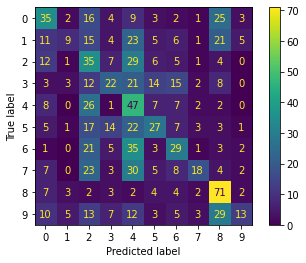

In [ ]:
#confusion matrix of best k that achieve the highest accuraccy 
_labels = range(10)
con_mat = confusion_matrix(Y_test, y_test_pred, labels=_labels)
disp_con_bestacc = ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=_labels)
disp_con_bestacc.plot()
plt.show

## Part 2. Logistic Regression (3 Marks)

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

### LOGISTIC REGRESSION

In [7]:
class_labels=[0,1,2,3,4,5,6,7,8,9]

In [10]:
def binarize_y(cls_lbl,y_tr_flatten):
  ytr=[]
  label_binarizer = preprocessing.LabelBinarizer()
  label_binarizer.fit(cls_lbl)
  b_ytrain=label_binarizer.transform(y_tr_flatten)
  for i in range(10):
    yb =  np.reshape(b_ytrain[:,i], (y_tr_flatten.shape[0],))
    ytr.append(yb)

  return ytr  

In [11]:
ytr_binarized_list = binarize_y(class_labels,Y_train)

In [12]:
predictions=[]
for i in ytr_binarized_list:
    logreg_model = LogisticRegression(random_state = 42)
    logreg_model.fit(X_train, i)
    y_pred = logreg_model.predict_proba(X_test)[:,1].reshape(-1,1)
    predictions.append(y_pred)

max_pred = np.argmax(predictions, axis=0)
print("the Max accuraccy of logistic equal: "+str(accuracy_score(y_test, max_pred)))


the Max accuraccy of logistic equal: 0.338


<function matplotlib.pyplot.show(*args, **kw)>

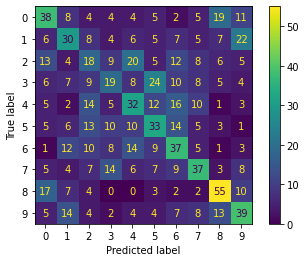

In [21]:
conf_matrix = confusion_matrix(Y_test, max_pred, labels=class_labels)
view_conf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
view_conf.plot()
plt.show

## Part 3. Support Vector Machine (SVM) Classification (4 Marks)

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

### SUPPORT VECTOR MACHINE

In [ ]:

x_train_svm =X_train
y_train_svm =Y_train

x_test_svm = X_test
y_test_svm =Y_test



model of SVM by linearsvc

In [ ]:
# use SVM Model with Linear Kernel  
SVM_model1 = svm.LinearSVC()
SVM_model1.fit(x_train_svm, y_train_svm)
SVM_model1.decision_function_shape ='ovr'
accuraccy = SVM_model1.score(x_test_svm,y_test_svm)*100
print(' Model Accuracy : {:.2f}%'.format(accuraccy))

 Model Accuracy : 28.30%


support vector machine with range of cost value

In [ ]:
# cost value that will give to model to mesure accuracy 
C =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
accuracy_c =[]
for (i ,c) in enumerate(C) :
    clf = svm.LinearSVC(C= c )
    clf.fit(x_train_svm ,y_train_svm)
    clf.decision_function_shape='ovr'
    acc = clf.score(x_test_svm,y_test_svm)*100
    acc ="%.2f" % acc
    accuracy_c.append(acc)

In [ ]:
#plot the accuracy varsis C paramter
for (i ,c) in enumerate(C) :
    print("the accuracy of {0} = {1} %".format(c,accuracy_c[i]))

the accuracy of 0.0001 = 36.40 %
the accuracy of 0.001 = 38.50 %
the accuracy of 0.01 = 35.70 %
the accuracy of 0.1 = 32.20 %
the accuracy of 1 = 25.60 %
the accuracy of 10 = 24.70 %
the accuracy of 100 = 25.90 %
the accuracy of 1000 = 25.80 %


<function matplotlib.pyplot.show(close=None, block=None)>

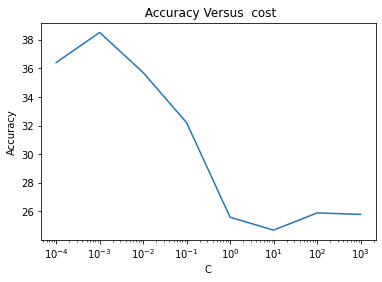

In [ ]:
accuraccy_v1=[float(x) for x in accuracy_c] 
plt.plot(C,accuraccy_v1)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title(" Accuracy Versus  cost")
plt.show


 Get Accuracy with range of Cost value and penalty =L1

In [ ]:
# cost value that will give to model to mesure accuracy 
C =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
accuracy_c_l1 =[]
clasifir_l1 =[]
for (i ,c) in enumerate(C) :
    clf = svm.LinearSVC(penalty = 'l1',dual =False ,C= c )
    clf.fit(x_train_svm ,y_train_svm)
    clasifir_l1.append(clf)
    acc = clf.score(x_test_svm,y_test_svm)*100
    acc ="%.2f" % acc
    accuracy_c_l1.append(acc)

In [ ]:
for (i ,c) in enumerate(C) :
    print("the accuracy of {0} = {1}%".format(c,accuracy_c_l1[i]))

the accuracy of 0.0001 = 10.00%
the accuracy of 0.001 = 13.90%
the accuracy of 0.01 = 32.80%
the accuracy of 0.1 = 38.80%
the accuracy of 1 = 31.30%
the accuracy of 10 = 28.60%
the accuracy of 100 = 27.70%
the accuracy of 1000 = 28.00%


<function matplotlib.pyplot.show(close=None, block=None)>

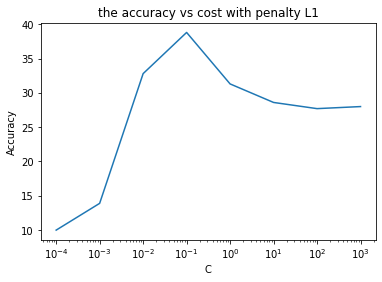

In [ ]:
accuraccy_v2=[float(x) for x in accuracy_c_l1] 
plt.plot(C , accuraccy_v2)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("the accuracy vs cost with penalty L1")
plt.xscale("log")
plt.show

In [ ]:
clf =clasifir_l1[3]
pred =clf.predict(x_test_svm)
print (classification_report(y_test_svm ,pred))


              precision    recall  f1-score   support

           0       0.38      0.35      0.36       100
           1       0.37      0.41      0.39       100
           2       0.27      0.14      0.19       100
           3       0.40      0.24      0.30       100
           4       0.34      0.30      0.32       100
           5       0.37      0.33      0.35       100
           6       0.33      0.47      0.39       100
           7       0.42      0.44      0.43       100
           8       0.50      0.67      0.57       100
           9       0.42      0.53      0.47       100

    accuracy                           0.39      1000
   macro avg       0.38      0.39      0.38      1000
weighted avg       0.38      0.39      0.38      1000



get accuracy with range of Cost & Gamme


In [ ]:
#kernel='rbf' 
cost =[0.01, 0.1, 1, 10, 100]
gama =[0.01, 0.1, 1, 10, 100]
accuracy_SVC=[]
clasifiers =[]
for i in cost :
    a =0
    for g in gama :
        clf = svm.SVC(kernel='rbf' ,C= i ,gamma =g)
        clf.fit(X_train ,Y_train )
        clf.decision_function_shape='ovr'
        clasifiers.append(clf)
        acc = clf.score(X_test,Y_test)
        if a < acc :
            a =acc
        print(" the C is ({}) and gamma is ({}) and Accuracy =  {:.2f}%".format( i, g, acc ) )
    accuracy_SVC.append([i ,a])


 the C is (0.01) and gamma is (0.01) and Accuracy =  0.28%
 the C is (0.01) and gamma is (0.1) and Accuracy =  0.11%
 the C is (0.01) and gamma is (1) and Accuracy =  0.10%
 the C is (0.01) and gamma is (10) and Accuracy =  0.20%
 the C is (0.01) and gamma is (100) and Accuracy =  0.10%
 the C is (0.1) and gamma is (0.01) and Accuracy =  0.35%
 the C is (0.1) and gamma is (0.1) and Accuracy =  0.11%
 the C is (0.1) and gamma is (1) and Accuracy =  0.10%
 the C is (0.1) and gamma is (10) and Accuracy =  0.20%
 the C is (0.1) and gamma is (100) and Accuracy =  0.10%
 the C is (1) and gamma is (0.01) and Accuracy =  0.47%
 the C is (1) and gamma is (0.1) and Accuracy =  0.18%
 the C is (1) and gamma is (1) and Accuracy =  0.10%
 the C is (1) and gamma is (10) and Accuracy =  0.20%
 the C is (1) and gamma is (100) and Accuracy =  0.10%
 the C is (10) and gamma is (0.01) and Accuracy =  0.49%
 the C is (10) and gamma is (0.1) and Accuracy =  0.19%
 the C is (10) and gamma is (1) and Accurac

get the best accuracy with change in C and print and plot 

In [ ]:
acc =[]
for i  in range(len(cost)) :
    acc.append(accuracy_SVC[i][1])
    print("the accuracy of C : {0} = {1}%".format(accuracy_SVC[i][0],accuracy_SVC[i][1]))

the accuracy of C : 0.01 = 0.277%
the accuracy of C : 0.1 = 0.351%
the accuracy of C : 1 = 0.465%
the accuracy of C : 10 = 0.49%
the accuracy of C : 100 = 0.486%


              precision    recall  f1-score   support

           0       0.53      0.51      0.52       100
           1       0.51      0.55      0.53       100
           2       0.43      0.43      0.43       100
           3       0.33      0.33      0.33       100
           4       0.43      0.39      0.41       100
           5       0.44      0.39      0.41       100
           6       0.53      0.55      0.54       100
           7       0.59      0.58      0.59       100
           8       0.60      0.62      0.61       100
           9       0.49      0.55      0.52       100

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000

[[0.01, 0.277], [0.1, 0.351], [1, 0.465], [10, 0.49], [100, 0.486]]


<function matplotlib.pyplot.show(close=None, block=None)>

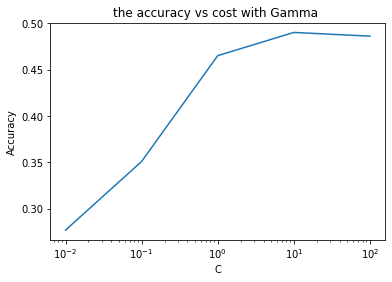

In [ ]:
#display the report for accuracy and recall and percision for the best accurracy with cost
clf =clasifiers[15]
pred =clf.predict(X_test)
print (classification_report(Y_test ,pred))
print(accuracy_SVC)
plt.plot(cost , acc)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("the accuracy vs cost with Gamma ")
plt.xscale("log")
plt.show


plot confusion matrix for best accuracy

In [ ]:
# the C is (10) and gamma is (0.01) and Accuracy =  0.49%

              precision    recall  f1-score   support

           0       0.53      0.51      0.52       100
           1       0.51      0.55      0.53       100
           2       0.43      0.43      0.43       100
           3       0.33      0.33      0.33       100
           4       0.43      0.39      0.41       100
           5       0.44      0.39      0.41       100
           6       0.53      0.55      0.54       100
           7       0.59      0.58      0.59       100
           8       0.60      0.62      0.61       100
           9       0.49      0.55      0.52       100

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



<function matplotlib.pyplot.show(close=None, block=None)>

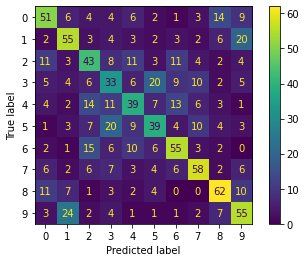

In [ ]:
clf = svm.SVC(kernel='rbf' ,C= 10 ,gamma =0.01)
clf.fit(X_train ,Y_train )
clf.decision_function_shape='ovr'
pred = clf.predict(X_test)
print (classification_report(Y_test ,pred)) 
conf_label = range(10)
con_matrix = confusion_matrix(Y_test, pred, labels=conf_label)
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix,display_labels=conf_label)
disp.plot()
plt.show

## Part 4. Write a Conclusion (1 Mark)

Write a conclusion comparing the results from each part of the assignment. Comment on the suitability of each method for this task.

<!-- Write your conclusion here -->